### On the GW190521 ringdown start time



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

In [2]:
# GWTC-2 TGR data release: https://dcc.ligo.org/LIGO-P2000438/public

gwtc_peaktimes_str = {
    "H1_median": "1242442967.42871", 
    "H1_pyRing_sample": "1242442967.42883", 
    "L1_pyRing_sample": "1242442967.42663", 
    "V1_pyRing_sample": "1242442967.42102", 
    "dt_H1L1": "-0.00212", 
    "dt_H1V1": "-0.00788"
    }

gwtc_peaktimes = {key: float(value) for key, value in gwtc_peaktimes_str.items()}

In [3]:
gwtc_peaktimes

{'H1_median': 1242442967.42871,
 'H1_pyRing_sample': 1242442967.42883,
 'L1_pyRing_sample': 1242442967.42663,
 'V1_pyRing_sample': 1242442967.42102,
 'dt_H1L1': -0.00212,
 'dt_H1V1': -0.00788}

In [4]:
gwtc_skyloc = {
    "rin_S190521g_pyring_Kerr_221_domega_dtau_221_0M.h5": {"ra": 0.16416072898840461, "dec": -1.1434284511661967}, 
    "rin_S190521g_pyring_DS_1mode_10M.h5": {"ra": 0.16416072898840461, "dec": -1.1434284511661967}, 
    "rin_S190521g_pyring_Kerr_220_10M.h5": {"ra": 0.16416072898840461, "dec": -1.1434284511661967}, 
    "rin_S190521g_pyring_Kerr_221_0M.h5": {"ra": 0.16416072898840461, "dec": -1.1434284511661967}, 
    "rin_S190521g_pyring_MMRDNP_10M.h5": {"ra": 0.16416072898840461, "dec": -1.1434284511661967}
    }

In [5]:
# GWTC-2 data release: https://dcc.ligo.org/LIGO-P2000223/public

# PublicationSamples:
gwtc_posterior = pd.read_csv('GW190521_publication_samples.dat')
gwtc_geocent = np.array(gwtc_posterior['geocent_time']) # (the GPS merger time at the geocenter)
gwtc_ra_post, gwtc_dec_post = np.array(gwtc_posterior[['ra', 'dec']]).T

In [6]:
list(gwtc_posterior.columns)

['log_likelihood',
 'chi_eff',
 'total_mass_source',
 'chi_p',
 'spin_1y',
 'final_mass',
 'phi_2',
 'phi_12',
 'ra',
 'phi_jl',
 'tilt_2',
 'cos_theta_jn',
 'a_2',
 'peak_luminosity',
 'mass_1',
 'mass_ratio',
 'cos_tilt_1',
 'a_1',
 'final_mass_source',
 'phase',
 'inverted_mass_ratio',
 'radiated_energy',
 'mass_2',
 'mass_2_source',
 'dec',
 'psi',
 'total_mass',
 'theta_jn',
 'redshift',
 'iota',
 'spin_1x',
 'chirp_mass',
 'cos_iota',
 'comoving_distance',
 'spin_2y',
 'tilt_1',
 'spin_2z',
 'mass_1_source',
 'geocent_time',
 'cos_tilt_2',
 'final_spin',
 'luminosity_distance',
 'spin_1z',
 'chirp_mass_source',
 'phi_1',
 'symmetric_mass_ratio',
 'spin_2x']

In [ ]:
max_likelihood = gwtc_posterior.sort_values('log_likelihood', ascending=False).iloc[0]
max_likelihood.ra, max_likelihood.dec

(6.2419527000000015, -1.1354638)

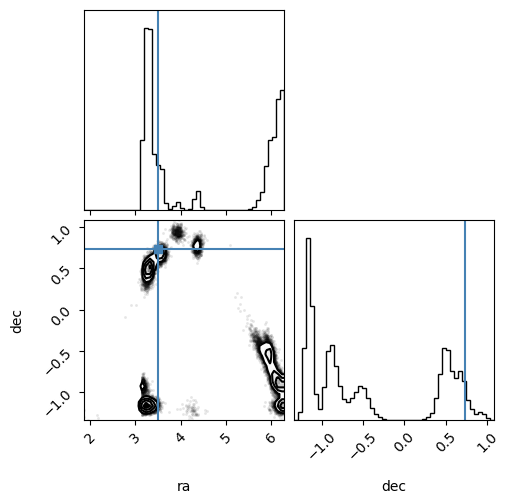

In [18]:
gwtc_ra_post[gwtc_ra_post < np.pi/2] += np.pi

_ = corner.corner(
    np.transpose([gwtc_ra_post, gwtc_dec_post]),
    labels=['ra', 'dec'],
    # truths=[3.5, 0.73],
    bins=50,
    )

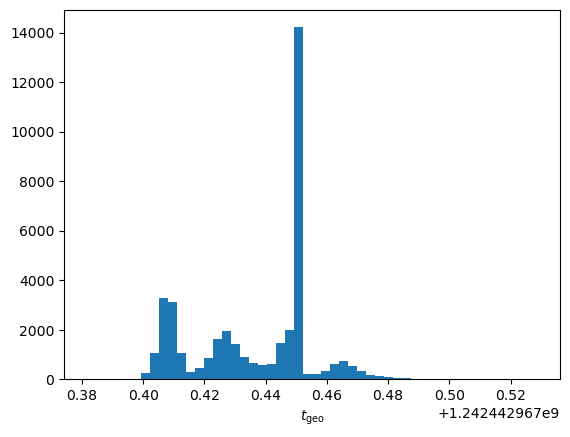

In [13]:
fig, ax = plt.subplots()

ax.hist(gwtc_geocent, bins=50)

_ = ax.set_xlabel('$t_\mathrm{geo}$')